In [10]:
import sys
sys.path.append('/home/yujiehe/anisotropy-flamingo')
import tools.clusterfit as cf
import numpy as np
import pandas as pd

## dipole H0 error

In [13]:
A_alls = [1.542, 1.099, 1.094]
p = [1/2, 1/2, 2/5]
H0_all = 68.1 #flamingo fiducial value

# Values
H0_sigma = np.empty((3, 8100))
H0 = np.empty((3, 8100))

i = 0
for relation in ['LX-T', 'YSZ-T', 'M-T']:
    best_fit_file = f'/data1/yujiehe/data/fits/testrun/lightcone1/scan_best_fit_{relation}_θ60.csv'
    best_fit = pd.read_csv(best_fit_file)

    A = best_fit['A'].values
    H0[i] = H0_all * (A/A_alls[i])**p[i]
    sigma = best_fit['sigma'].values
    H0_sigma[i] = sigma
    i += 1

H0_ave = np.average(H0, axis=0, weights=1/H0_sigma**2)
H0_ave = H0_ave.reshape(90, 90).T

/var/tmp/yujiehe/ipykernel_3212130/1737431577.py:20: RuntimeWarning: divide by zero encountered in divide
  H0_ave = np.average(H0, axis=0, weights=1/H0_sigma**2)
/data1/yujiehe/conda-env/halo/lib/python3.11/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


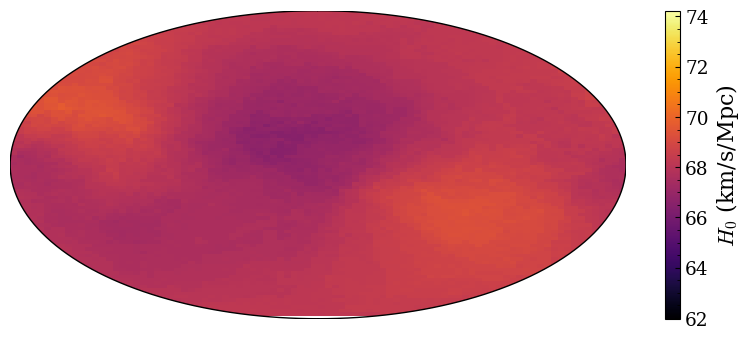

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("./nice.mplstyle")
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(10, 4))
m = Basemap(projection='hammer', lon_0=0)

# Coordinates
lon = np.linspace(-180, 180, 90)
lat = np.linspace(-90, 90, 90)
lons, lats = np.meshgrid(lon, lat)
x, y = m(lons, lats)

im = m.imshow(H0_ave,  extent=[-180, 180, -90, 90], 
              vmin=0.91*H0_all, vmax=1.09*H0_all,
              cmap='inferno')

plt.colorbar(im, label='$H_0$ (km/s/Mpc)')
# plt.title('$L_\\mathrm{{X}}-T\\quad Y_\\mathrm{{SZ}}-T\\quad M_\\mathrm{{gas}}-T\\quad\\theta=60\\degree$', loc='right')
plt.savefig('../data/plots/H0_map_for_meeting_lc1.png', dpi=300, transparent=True)
plt.show()

## std H0 error

In [6]:
A_alls = [1.542, 1.099, 1.094]
p = [1/2, 1/2, 2/5]
H0_all = 68.1 #flamingo fiducial value

# Values
H0_std = np.empty((3, 8100))
H0 = np.empty((3, 8100))

i = 0
for relation in ['LX-T', 'YSZ-T', 'M-T']:
    best_fit_file = f'/data1/yujiehe/data/fits/testrun/lightcone1/scan_best_fit_{relation}_θ60.csv'
    bootstrap_file = f'/data1/yujiehe/data/fits/testrun/lightcone1/scan_bootstrap_{relation}_θ60.csv'
    df = cf.A_variance_map(best_fit_file, bootstrap_file)
    best_fit = pd.read_csv(best_fit_file)

    A = best_fit['A'].values
    H0[i] = H0_all * (A/A_alls[i])**p[i]
    A_std = df['A_std'].values
    H0_std[i] = H0_all * p[i] * (A/A_alls[i])**(p[i]-1) * A_std
    i += 1

H0_ave = np.average(H0, axis=0, weights=1/H0_std**2)
H0_ave = H0_ave.reshape(90, 90).T

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


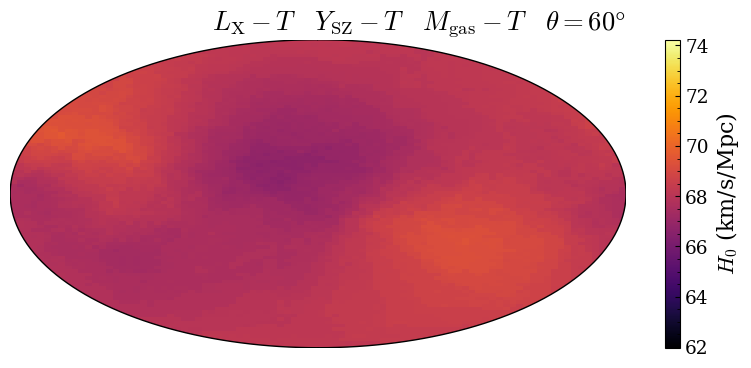

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("./nice.mplstyle")
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(10, 4))
m = Basemap(projection='hammer', lon_0=0)

# Coordinates
lon = np.linspace(-180, 180, 90)
lat = np.linspace(-90, 90, 90)
lons, lats = np.meshgrid(lon, lat)
x, y = m(lons, lats)

im = m.imshow(H0_ave,  extent=[-180, 180, -90, 90], 
              cmap='inferno')

plt.colorbar(im, label='$H_0$ (km/s/Mpc)')
plt.title('$L_\\mathrm{{X}}-T\\quad Y_\\mathrm{{SZ}}-T\\quad M_\\mathrm{{gas}}-T\\quad\\theta=60\\degree$', loc='right')
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


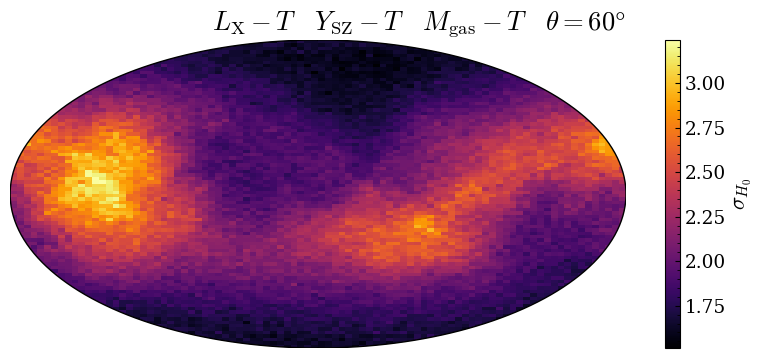

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("./nice.mplstyle")
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(10, 4))
m = Basemap(projection='hammer', lon_0=0)

# Coordinates
lon = np.linspace(-180, 180, 90)
lat = np.linspace(-90, 90, 90)
lons, lats = np.meshgrid(lon, lat)
x, y = m(lons, lats)

H0_sigma = np.sum(H0_std**2, axis=0)**0.5
H0_sigma = H0_sigma.reshape(90, 90).T
im = m.imshow(H0_sigma, extent=[-180, 180, -90, 90], cmap='inferno')

plt.colorbar(im, label='$\\sigma_{{H_0}}$')
plt.title('$L_\\mathrm{{X}}-T\\quad Y_\\mathrm{{SZ}}-T\\quad M_\\mathrm{{gas}}-T\\quad\\theta=60\\degree$', loc='right')
plt.show()

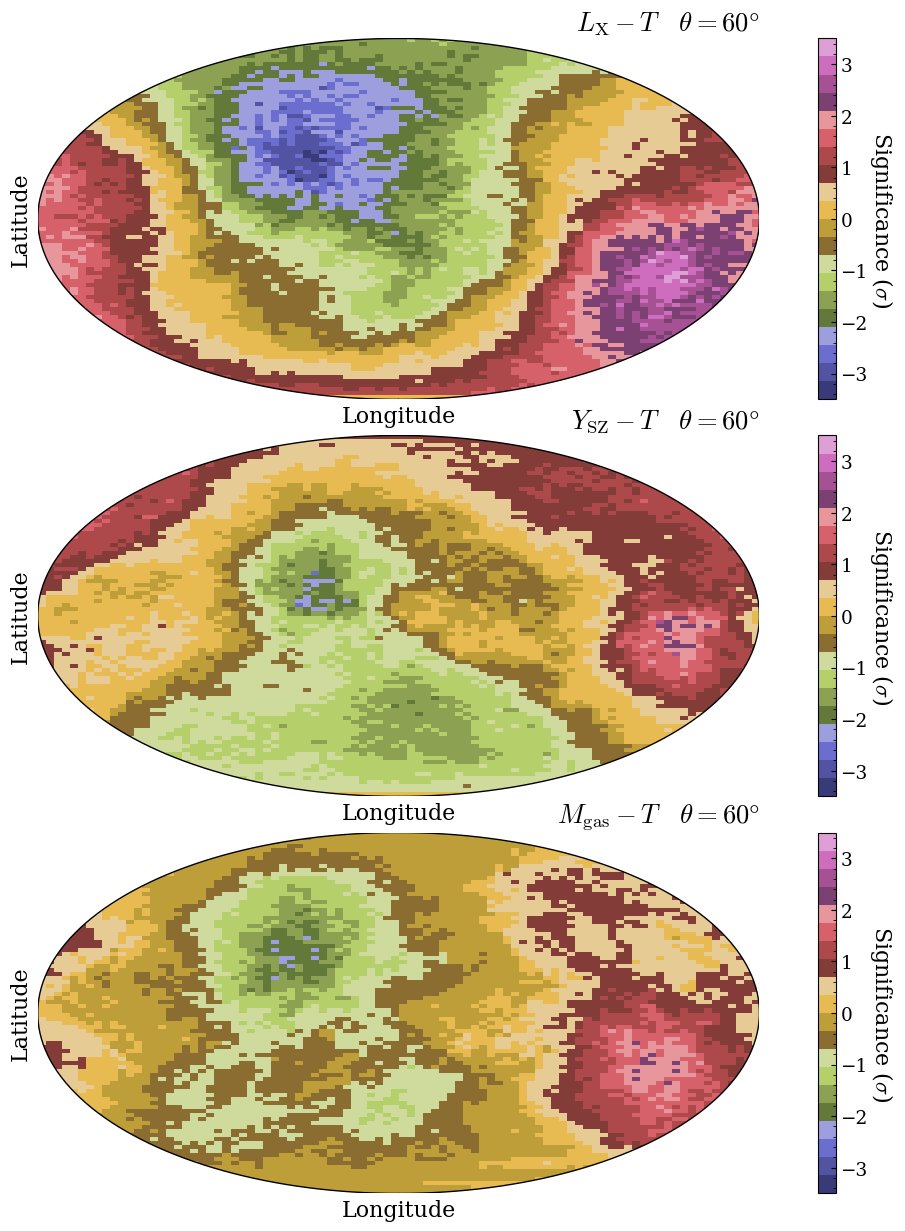

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.style.use("./nice.mplstyle")
import pandas as pd
import numpy as np

fig, ax = plt.subplots(3, 1, figsize=(15, 15))
plt.subplots_adjust(hspace=0.1, wspace=0.05)

m = Basemap(projection='hammer', lon_0=0)

lon = np.linspace(-180, 180, 90)
lat = np.linspace(-90, 90, 90)
lons, lats = np.meshgrid(lon, lat)
x, y = m(lons, lats)


files = ['../data/fits/testrun/lightcone1/scan_best_fit_LX-T_θ60.csv', 
         '../data/fits/testrun/lightcone1/scan_best_fit_YSZ-T_θ60.csv',
         '../data/fits/testrun/lightcone1/scan_best_fit_M-T_θ60.csv', 
        ]

titles = ['$L_\\mathrm{{X}}-T\\quad\\theta=60\\degree$',
          '$Y_\\mathrm{{SZ}}-T\\quad\\theta=60\\degree$',
          '$M_\\mathrm{{gas}}-T\\quad\\theta=60\\degree$',
        ]


idx = 0
for subax in ax:
    subax.set_xlabel('Longitude')
    subax.set_ylabel('Latitude')
    # Load the data from the file
    df = pd.read_csv(files[idx])
    data = np.array(df['n_sigma']).reshape(90, 90).T
    # Display the data as an image; set the extent of the map
    im = m.imshow(data, extent=[-180, 180, -90, 90], cmap='tab20b', 
                    ax=subax, vmin=-3.5, vmax=3.5)

    cbar = plt.colorbar(im, ax=subax)
    cbar.set_label('Significance ($\\sigma$)', rotation=270, labelpad=20)
    subax.set_title(titles[idx], loc='right')
    idx += 1

plt.show()